In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style='whitegrid')

In [7]:
def bench(source, n=2**20):
    res = !make {source}.run n={n}
    performance = float(res[-1].split()[0])
    print(source, n, performance)
    return performance

bench('scalar')

scalar 1048576 1.36


1.36

only update: 5.8
only prefix: 8.1

In [20]:
bench('simd', n=2**15)

simd 32768 8.08


8.08

In [33]:
bench('simd-interleaved', 2**25)

simd-interleaved 33554432 1.8


1.8

In [40]:
step = 2**12
ns = list(int(1.2**k) * step for k in range(10, 50))
ns = [step, 2 * step, 3 * step, 4 * step, 5 * step] + ns
#ns

In [41]:
scalar = [bench('scalar', n=n) for n in ns]

scalar 4096 1.5
scalar 8192 1.65
scalar 12288 1.5
scalar 16384 1.47
scalar 20480 1.6
scalar 24576 1.46
scalar 28672 1.52
scalar 32768 1.58
scalar 40960 1.55
scalar 49152 1.59
scalar 61440 1.59
scalar 73728 1.64
scalar 90112 1.59
scalar 106496 1.65
scalar 126976 1.54
scalar 155648 1.55
scalar 188416 1.51
scalar 225280 1.46
scalar 270336 1.47
scalar 323584 1.47
scalar 389120 1.46
scalar 466944 1.45
scalar 561152 1.43
scalar 671744 1.39
scalar 806912 1.34
scalar 970752 1.28
scalar 1163264 1.27
scalar 1396736 1.2
scalar 1679360 1.23
scalar 2015232 1.25
scalar 2416640 1.28
scalar 2899968 1.28
scalar 3481600 1.28
scalar 4177920 1.24
scalar 5013504 1.23
scalar 6017024 1.19
scalar 7221248 1.29
scalar 8667136 1.19
scalar 10399744 1.24
scalar 12480512 1.26
scalar 14979072 1.28
scalar 17973248 1.12
scalar 21569536 1.03
scalar 25882624 1.11
scalar 31059968 1.22


In [42]:
simd = [bench('simd', n=n) for n in ns]
blocked = [bench('simd-blocked', n=n) for n in ns]
interleaved = [bench('simd-interleaved', n=n) for n in ns]

simd 4096 3.58
simd 8192 3.63
simd 12288 3.32
simd 16384 3.33
simd 20480 3.34
simd 24576 3.35
simd 28672 3.35
simd 32768 3.34
simd 40960 3.34
simd 49152 3.33
simd 61440 3.33
simd 73728 3.24
simd 90112 3.19
simd 106496 3.21
simd 126976 3.18
simd 155648 3.15
simd 188416 3.06
simd 225280 3.06
simd 270336 3.04
simd 323584 2.99
simd 389120 2.96
simd 466944 2.85
simd 561152 2.81
simd 671744 2.54
simd 806912 2.02
simd 970752 1.67
simd 1163264 1.16
simd 1396736 1.09
simd 1679360 0.88
simd 2015232 0.99
simd 2416640 1.01
simd 2899968 1.02
simd 3481600 1.01
simd 4177920 0.99
simd 5013504 0.88
simd 6017024 0.93
simd 7221248 1.0
simd 8667136 0.98
simd 10399744 0.98
simd 12480512 0.92
simd 14979072 0.98
simd 17973248 0.96
simd 21569536 0.99
simd 25882624 0.99
simd 31059968 0.99
simd-blocked 4096 3.5
simd-blocked 8192 3.68
simd-blocked 12288 3.57
simd-blocked 16384 3.58
simd-blocked 20480 3.61
simd-blocked 24576 3.6
simd-blocked 28672 3.61
simd-blocked 32768 3.6
simd-blocked 40960 3.59
simd-blocked 4

In [43]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None, xlabel='Array size', loc='best'):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', basex=2)
    plt.xlabel(xlabel)

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc=loc)

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()

In [62]:
prefetch = [bench('simd-prefetch', n=n) for n in ns]
nontemporal = [bench('simd-nontemporal', n=n) for n in ns]

simd-prefetch 4096 3.25
simd-prefetch 8192 3.29
simd-prefetch 12288 3.15
simd-prefetch 16384 3.17
simd-prefetch 20480 3.15
simd-prefetch 24576 3.16
simd-prefetch 28672 3.15
simd-prefetch 32768 3.12
simd-prefetch 40960 3.13
simd-prefetch 49152 3.14
simd-prefetch 61440 3.14
simd-prefetch 73728 3.13
simd-prefetch 90112 3.12
simd-prefetch 106496 3.02
simd-prefetch 126976 3.04
simd-prefetch 155648 3.1
simd-prefetch 188416 3.02
simd-prefetch 225280 2.98
simd-prefetch 270336 2.98
simd-prefetch 323584 2.89
simd-prefetch 389120 2.9
simd-prefetch 466944 2.92
simd-prefetch 561152 2.83
simd-prefetch 671744 2.76
simd-prefetch 806912 2.69
simd-prefetch 970752 2.5
simd-prefetch 1163264 2.24
simd-prefetch 1396736 1.87
simd-prefetch 1679360 1.75
simd-prefetch 2015232 1.87
simd-prefetch 2416640 1.79
simd-prefetch 2899968 1.71
simd-prefetch 3481600 1.84
simd-prefetch 4177920 1.63
simd-prefetch 5013504 1.8
simd-prefetch 6017024 1.83
simd-prefetch 7221248 1.69
simd-prefetch 8667136 1.91
simd-prefetch 10399

ValueError: could not convert string to float: 'make:'

In [69]:
all = [bench('simd-nontemporal-prefetch', n=n) for n in ns]

simd-nontemporal-prefetch 4096 1.41
simd-nontemporal-prefetch 8192 1.69
simd-nontemporal-prefetch 12288 2.05
simd-nontemporal-prefetch 16384 2.17
simd-nontemporal-prefetch 20480 2.15
simd-nontemporal-prefetch 24576 2.22
simd-nontemporal-prefetch 28672 2.17
simd-nontemporal-prefetch 32768 2.21
simd-nontemporal-prefetch 40960 2.29
simd-nontemporal-prefetch 49152 2.15
simd-nontemporal-prefetch 61440 2.18
simd-nontemporal-prefetch 73728 2.17
simd-nontemporal-prefetch 90112 2.17
simd-nontemporal-prefetch 106496 2.14
simd-nontemporal-prefetch 126976 2.21
simd-nontemporal-prefetch 155648 2.18
simd-nontemporal-prefetch 188416 2.15
simd-nontemporal-prefetch 225280 2.18
simd-nontemporal-prefetch 270336 2.16
simd-nontemporal-prefetch 323584 2.18
simd-nontemporal-prefetch 389120 2.19
simd-nontemporal-prefetch 466944 2.18
simd-nontemporal-prefetch 561152 2.16
simd-nontemporal-prefetch 671744 2.13
simd-nontemporal-prefetch 806912 2.2
simd-nontemporal-prefetch 970752 2.22
simd-nontemporal-prefetch 11

In [64]:
iprefetch = [bench('simd-interleaved-prefetch', n=n) for n in ns]

simd-interleaved-prefetch 4096 3.74
simd-interleaved-prefetch 8192 3.81
simd-interleaved-prefetch 12288 3.83
simd-interleaved-prefetch 16384 3.87
simd-interleaved-prefetch 20480 3.87
simd-interleaved-prefetch 24576 3.89
simd-interleaved-prefetch 28672 3.9
simd-interleaved-prefetch 32768 3.9
simd-interleaved-prefetch 40960 3.9
simd-interleaved-prefetch 49152 3.93
simd-interleaved-prefetch 61440 3.88
simd-interleaved-prefetch 73728 3.92
simd-interleaved-prefetch 90112 3.9
simd-interleaved-prefetch 106496 3.9
simd-interleaved-prefetch 126976 3.86
simd-interleaved-prefetch 155648 3.85
simd-interleaved-prefetch 188416 3.83
simd-interleaved-prefetch 225280 3.8
simd-interleaved-prefetch 270336 3.76
simd-interleaved-prefetch 323584 3.64
simd-interleaved-prefetch 389120 3.69
simd-interleaved-prefetch 466944 3.61
simd-interleaved-prefetch 561152 3.56
simd-interleaved-prefetch 671744 3.52
simd-interleaved-prefetch 806912 3.38
simd-interleaved-prefetch 970752 3.28
simd-interleaved-prefetch 1163264

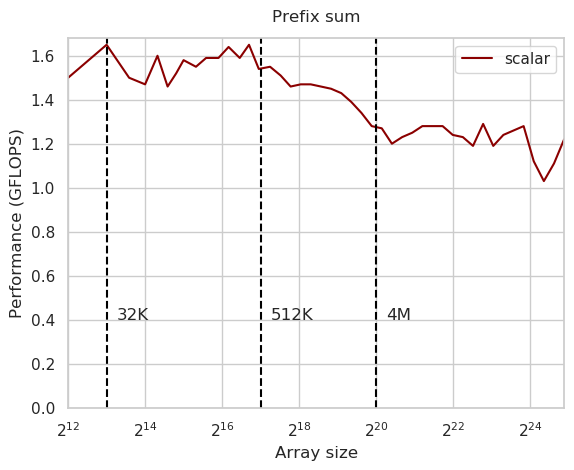

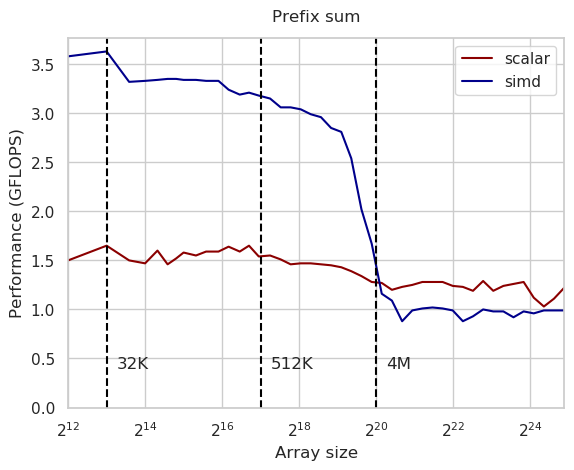

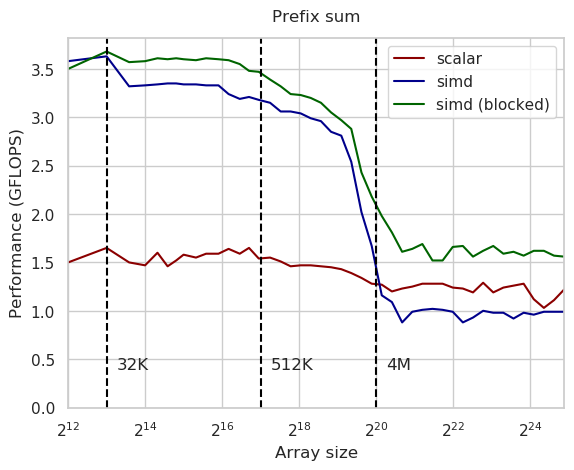

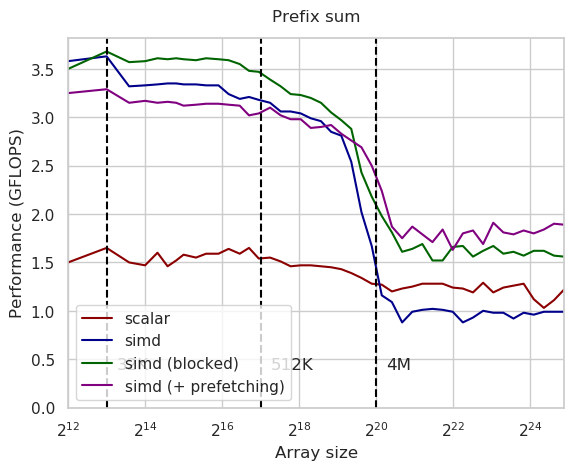

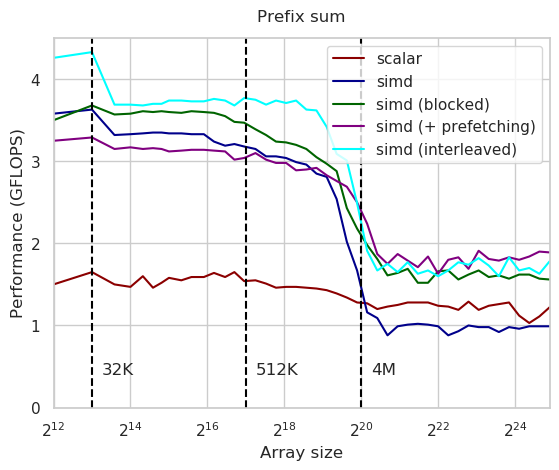

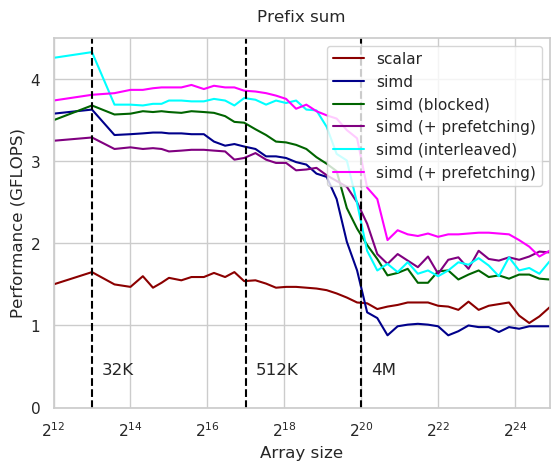

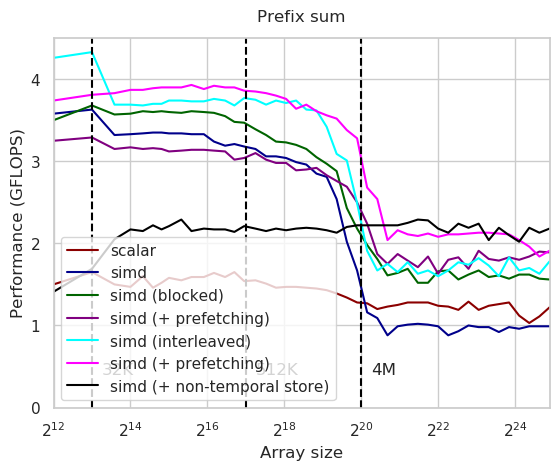

In [70]:
sources = [
    # plot, filename, color, label
    (scalar, 'scalar', 'darkred', 'scalar'),
    (simd, 'simd', 'darkblue', 'simd'),
    (blocked, 'blocked', 'darkgreen', 'simd (blocked)'),
    (prefetch, 'prefetch', 'purple', 'simd (+ prefetching)'),
    (interleaved, 'interleaved', 'cyan', 'simd (interleaved)'),
    (iprefetch, 'interleaved-prefetch', 'magenta', 'simd (+ prefetching)'),
    (all, 'nontemporal', 'black', 'simd (+ non-temporal store)'),
]

for i in range(1, len(sources) + 1):
    for (data, suffix, color, label) in sources[:i]:
        plt.plot(ns, data, color=color, label=label)
    _, suffix, _, _ = sources[i - 1]
    plot('Prefix sum', 'Performance (GFLOPS)', f'prefix-{suffix}.svg', 0.4, legend=True)

In [65]:
for i in range(1, len(sources) + 1):
    for (data, suffix, color, label) in sources[:i]:
        plt.plot(ns, data, color=color, label=label)
    _, suffix, _, _ = sources[i - 1]
    plot('Prefix sum', 'Performance (GFLOPS)', f'prefix-{suffix}.svg', 0.4, legend=True)

NameError: name 'sources' is not defined

In [61]:
bench('simd-nontemporal', n=2**25)

ValueError: could not convert string to float: 'make:'